### To Explore Supervised Machine Learning

The task given to us is to find - What will be predicted score if a student study for 9.25 hrs in a day?

## Steps:
* Import all the required libraries
* Collection of data

* Visualization of data

* Segregation of the data for training and testing

* Training the data using Logistic Regression Algorithm

* Testing the data and finding its accuracy

* Predict the Result

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading the CSV file
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


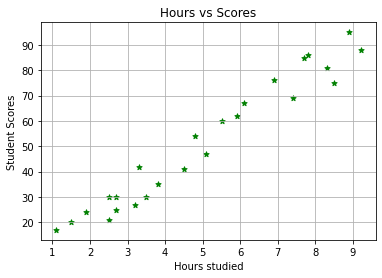

In [5]:
# Plotting the graph
# x-axis values 
x = data['Hours']
# y-axis values 
y = data['Scores']

# plotting points as a scatter plot 
plt.scatter(x, y, label= "Data points", color= "green", marker= "*", s=30) 

# x-axis label 
plt.xlabel('Hours studied') 
# frequency label 
plt.ylabel('Student Scores') 
# plot title 
plt.title('Hours vs Scores') 
# showing grid
plt.grid()
plt.rcParams['axes.facecolor'] = '#FFFF00'
# function to show the plot 
plt.show()

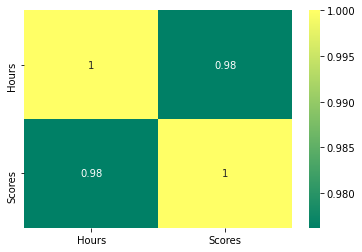

From the graph, we can refer that there is 98% corelation between Hours and Scores


In [6]:
#To find the corelation between the number of hours studied and scores obtained
relation = data.corr()
sns.heatmap(relation, annot=True, cmap='summer') 
plt.show()
print('From the graph, we can refer that there is 98% corelation between Hours and Scores')

In [7]:
# Classification of data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [8]:
# Spliting the data for training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Fitting the data in the model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

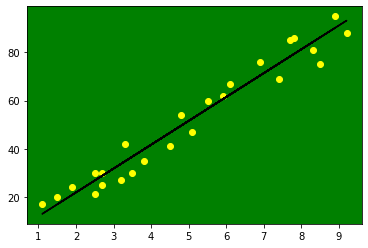

(array([9.91065648]), 2.018160041434683)

In [12]:
# Plotting the Linear regression line
line = model.coef_ * x + model.intercept_

# Plotting for the test data
plt.rcParams['axes.facecolor'] = 'green'
plt.scatter(x, y,color ='#FFFF00')
plt.plot(x, line, color='black')
plt.show()
model.coef_,model.intercept_

In [13]:
# Predicting the Result
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
# Comparing Actual vs Predicted
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<BarContainer object of 5 artists>

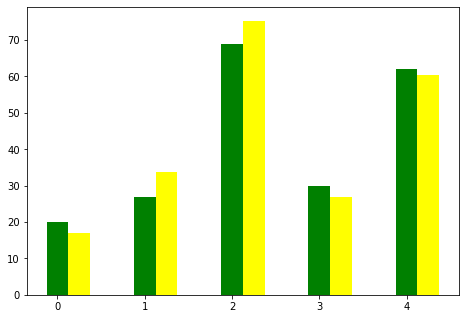

In [16]:
# Comparing Actual vs Predicted score through bar plot
l = []
for i in y_test:
    l.append(i)
for i in y_pred:
    l.append(i)
l = np.array(l)
l = l.reshape(2,5)
data = l
X = np.arange(5)
fig = plt.figure()
plt.rcParams['axes.facecolor'] = 'white'
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'green', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'yellow', width = 0.25)

In [17]:
#Accuracy of training and testing data
print(f'The train score:  {model.score(X_train,y_train)}')
print(f'The test score:   {model.score(X_test,y_test)}')

The train score:  0.9515510725211552
The test score:   0.9454906892105356


In [18]:
# Calculating the mean absolute error and mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('mean squared error: ', mean_squared_error(y_test,y_pred))
print('mean absolute error: ', mean_absolute_error(y_test,y_pred))

mean squared error:  21.5987693072174
mean absolute error:  4.183859899002975


In [20]:
# Predicting the result for the input of 9.25 Hours 
hours = [[9.25]]
pred1 = model.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred1))

Number of Hours = [[9.25]]
Predicted Score = [93.69173249]
